In [1]:
#Importing required packages
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [4]:
#Dataset prepared manually
data = pd.read_csv('dataset.csv', encoding = 'unicode_escape')
data = data.dropna(axis="rows")

data

,Questions,Responses,Class
1,Special Discounts for OPEN FINANCE Customers n...,We regret the inconvenience. Please try again.,Account Enquiry
2,I am unable to add products to my wishlist,Please try adding your product again to the wi...,Account Enquiry
3,Special Discounts for OPEN FINANCE Customers n...,We regret the inconvenience. Please try again.,Account Enquiry
4,My session expired. What do I do now?,We regret the inconvenience. Please try after ...,Account Enquiry
5,Merchant site is not responding.,We regret the inconvenience. Please try after ...,Account Enquiry
...,...,...,...
259,Shit!,Please withdraw your inconvenient words..How c...,General
260,What the heck?,Please withdraw your inconvenient words..How c...,General
261,What the hell?,Please withdraw your inconvenient words..How c...,General
262,heck,Please withdraw your inconvenient words..How c...,General


In [5]:
#Converting the text words into vectors
vectorizer = CountVectorizer()

vectorizer.fit(data["Questions"])
X= vectorizer.transform(data["Questions"])
Y = data["Responses"]

print(X)
print(Y)

  (0, 28)	1
  (0, 31)	1
  (0, 34)	1
  (0, 103)	1
  (0, 118)	1
  (0, 122)	1
  (0, 148)	1
  (0, 152)	1
  (0, 188)	1
  (0, 246)	1
  (0, 251)	1
  (0, 261)	1
  (0, 354)	1
  (0, 374)	2
  (1, 11)	1
  (1, 21)	1
  (1, 235)	1
  (1, 293)	1
  (1, 380)	2
  (1, 392)	1
  (1, 424)	1
  (2, 28)	1
  (2, 31)	1
  (2, 34)	1
  (2, 103)	1
  :	:
  (249, 342)	1
  (250, 154)	1
  (251, 343)	1
  (252, 33)	1
  (252, 154)	1
  (252, 374)	1
  (252, 416)	1
  (252, 432)	1
  (253, 63)	1
  (254, 33)	1
  (254, 343)	1
  (254, 416)	1
  (254, 432)	1
  (255, 343)	1
  (255, 374)	1
  (255, 416)	1
  (256, 343)	1
  (257, 171)	1
  (257, 374)	1
  (257, 416)	1
  (258, 172)	1
  (258, 374)	1
  (258, 416)	1
  (259, 171)	1
  (260, 172)	1
1         We regret the inconvenience. Please try again.
2      Please try adding your product again to the wi...
3         We regret the inconvenience. Please try again.
4      We regret the inconvenience. Please try after ...
5      We regret the inconvenience. Please try after ...
                    

In [10]:
count = Counter(Y)
print(count)

Counter({"Sir/Madam, through which means you'd like to deposit?..Using Atm Card or using Deposit slip": 16, 'Please withdraw your inconvenient words..How can I help you?': 13, 'You can get it by using your phone number linked to the bank or using your credit/debit card.': 12, 'Please go to the atm and use credit/debit card to obtain money, or else use cheque or withdrawal slip for taking out money': 11, 'Please give your id and address proofs in the counter and after validation you can obtain the passbook and debit/credit card for the account provided to you': 11, 'Please give the feedback to the bank about your inconvenience and you can discontinue your account if the problem cannot be solved. ': 11, 'I am a banking assistant..How can I help you?': 11, 'Fill up the details in the slip in the following way: First name of the Depositor, Account he/she is depositing to, the amount, Signature of the depositor.': 10, 'Provide your account details in the counter and they will respond to you

c:\users\elcot\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\elcot\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


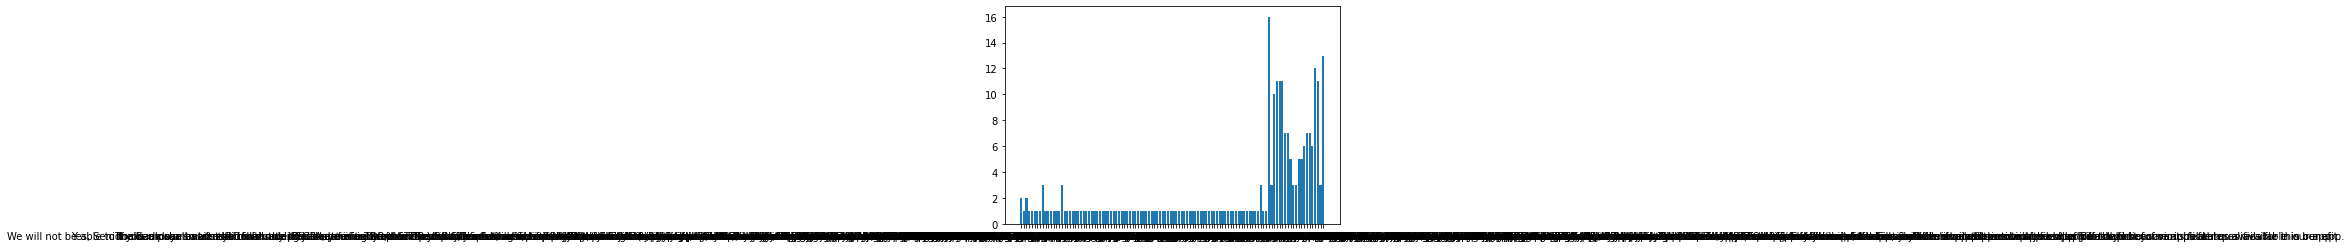

In [7]:
#Visualizing the word occurences in the text
names = list(count.keys())
values= list(count.values())

plt.bar(names,values)
plt.show()

In [17]:
print("Class count:",len(names))

Class count: 112


In [13]:
#Sampling the dataset to increase the data quantity
oversampler = RandomOverSampler(sampling_strategy='minority')
sm_X, sm_Y = oversampler.fit_resample(X, Y)

print(sm_X)
print(sm_Y)

  (0, 28)	1
  (0, 31)	1
  (0, 34)	1
  (0, 103)	1
  (0, 118)	1
  (0, 122)	1
  (0, 148)	1
  (0, 152)	1
  (0, 188)	1
  (0, 246)	1
  (0, 251)	1
  (0, 261)	1
  (0, 354)	1
  (0, 374)	2
  (1, 11)	1
  (1, 21)	1
  (1, 235)	1
  (1, 293)	1
  (1, 380)	2
  (1, 392)	1
  (1, 424)	1
  (2, 28)	1
  (2, 31)	1
  (2, 34)	1
  (2, 103)	1
  :	:
  (274, 99)	1
  (274, 161)	1
  (274, 188)	1
  (274, 209)	1
  (274, 223)	1
  (274, 250)	1
  (274, 256)	1
  (274, 265)	1
  (274, 334)	1
  (274, 372)	1
  (274, 374)	1
  (275, 8)	1
  (275, 22)	1
  (275, 68)	1
  (275, 99)	1
  (275, 161)	1
  (275, 188)	1
  (275, 209)	1
  (275, 223)	1
  (275, 250)	1
  (275, 256)	1
  (275, 265)	1
  (275, 334)	1
  (275, 372)	1
  (275, 374)	1
0         We regret the inconvenience. Please try again.
1      Please try adding your product again to the wi...
2         We regret the inconvenience. Please try again.
3      We regret the inconvenience. Please try after ...
4      We regret the inconvenience. Please try after ...
                       

In [14]:
count_samp = Counter(sm_Y)
print(count_samp)

Counter({'Amount will be credited to your stated Account only. You can however, transfer these funds to your any other Account through our Fund Transfer facility, Net Banking facility, RTGS, etc.': 16, "Sir/Madam, through which means you'd like to deposit?..Using Atm Card or using Deposit slip": 16, 'Please withdraw your inconvenient words..How can I help you?': 13, 'You can get it by using your phone number linked to the bank or using your credit/debit card.': 12, 'Please go to the atm and use credit/debit card to obtain money, or else use cheque or withdrawal slip for taking out money': 11, 'Please give your id and address proofs in the counter and after validation you can obtain the passbook and debit/credit card for the account provided to you': 11, 'Please give the feedback to the bank about your inconvenience and you can discontinue your account if the problem cannot be solved. ': 11, 'I am a banking assistant..How can I help you?': 11, 'Fill up the details in the slip in the fol

c:\users\elcot\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\elcot\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


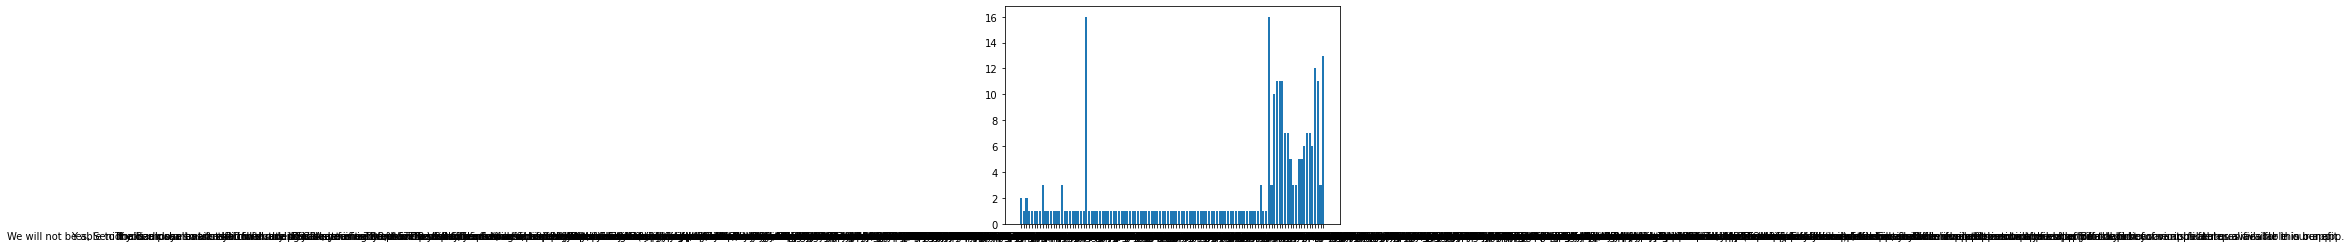

In [15]:
names_2 = list(count_samp.keys())
values_2 = list(count_samp.values())

plt.bar(names_2,values_2)
plt.show()

In [18]:
#Building a text classification model according to different kind of bank queries
chat_mod = knn(n_neighbors=4)

chat_mod.fit(sm_X,sm_Y)

KNeighborsClassifier(n_neighbors=4)

In [19]:
import pickle

#Saving the model used for prediction
#as well as the vectorizer for converting words into vector

with open('chat_model', 'wb') as files:
    pickle.dump(chat_mod, files)
    
with open('vectorizer_mod', 'wb') as files:
    pickle.dump(vectorizer, files)

In [20]:
#Testing the model with new data
data_to_predict = ["I need to put cash"]
data_to_predict = vectorizer.transform(data_to_predict)

predict = chat_mod.predict(data_to_predict)

print(predict[0])

Sir/Madam, through which means you'd like to deposit?..Using Atm Card or using Deposit slip
